# **1. Perkenalan Dataset**


# Perkenalan Dataset

## 1.1 Sumber Dataset
Dataset ini diperoleh dari **data.gov**, sebuah platform penyedia data terbuka milik pemerintah Amerika Serikat. Dataset yang digunakan berjudul **Air Quality**, dengan metadata terakhir diperbarui pada **19 April 2024**.

**Deskripsi dataset:**
Dataset ini berisi informasi tentang surveilans kualitas udara di Kota New York (**New York City Air Quality Surveillance Data**). Polusi udara merupakan salah satu ancaman lingkungan paling signifikan bagi populasi perkotaan. Meskipun semua orang terkena dampak, emisi polutan, tingkat paparan, dan kerentanan populasi bervariasi antar lingkungan. Paparan terhadap polutan udara umum telah dikaitkan dengan penyakit pernapasan dan kardiovaskular, kanker, serta kematian dini. Indikator dalam dataset ini menyediakan perspektif lintas waktu dan wilayah geografis NYC untuk lebih memahami kualitas udara dan dampaknya terhadap kesehatan masyarakat.



Dataset ini juga dapat dieksplorasi lebih lanjut melalui portal data lingkungan dan kesehatan NYC: [Environment and Health Data Portal](http://nyc.gov/health/environmentdata).

---

## 1.2 Ketentuan Dataset

Dataset ini memenuhi kriteria yang telah ditentukan untuk tahap clustering dengan rincian sebagai berikut:

- **Tanpa label**: Dataset ini tidak memiliki label atau kelas bawaan, sehingga dapat digunakan dalam proses unsupervised learning (clustering) sebelum dilakukan klasifikasi.
- **Jumlah Baris**: Dataset ini memiliki lebih dari **1000 baris**, sehingga cukup besar untuk analisis yang bermakna.
- **Tipe Data**: Dataset ini mengandung berbagai tipe data, baik **numerik** maupun **kategorikal**:
  - **Numerikal**: Konsentrasi polutan seperti PM2.5, NO2, SO2, dan O3.
  - **Kategorikal**: Wilayah geografis (misalnya borough NYC), jenis lokasi pemantauan, dan waktu pengukuran.

---

## 1.3 Pembatasan

Dalam memilih dataset, terdapat beberapa batasan yang perlu diperhatikan:
- Dataset yang sudah digunakan dalam latihan clustering (misalnya *customer segmentation*) **tidak boleh digunakan**.
- Dataset harus cukup beragam dalam variabelnya agar dapat memberikan wawasan yang bermakna setelah clustering dilakukan.

Dengan mengikuti ketentuan ini, dataset **Air Quality** memenuhi syarat untuk proses clustering dan dapat digunakan sebagai dasar dalam tahap klasifikasi selanjutnya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [50]:
# Import library dasar untuk analisis data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
%matplotlib inline

# Library untuk preprocessing dan clustering
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, LogisticRegression
from scipy.spatial.distance import pdist
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

Penjelasan singkat dari kode di atas:

1. **Import Library Dasar:**
   - `numpy` dan `pandas`: Untuk manipulasi dan analisis data.
   - `matplotlib.pyplot` dan `seaborn`: Untuk visualisasi data.
   - `scipy.cluster.hierarchy`: Untuk melakukan clustering hierarkis.

2. **Preprocessing dan Clustering:**
   - `PCA`: Untuk analisis komponen utama, mengurangi dimensi data.
   - `Lasso` dan `LogisticRegression`: Model regresi untuk analisis prediktif.
   - `pdist`: Menghitung jarak antar pasangan observasi.
   - `GridSearchCV`: Untuk pencarian parameter optimal.
   - `AgglomerativeClustering`: Algoritma clustering hierarkis.
   - `ParameterGrid`: Membuat grid parameter untuk pencarian.
   - `silhouette_score` dan `make_scorer`: Untuk mengevaluasi kualitas clustering.
   - `StandardScaler` dan `MinMaxScaler`: Untuk normalisasi data.
   - `LabelEncoder`: Untuk mengubah label menjadi format numerik.
   - `dendrogram` dan `linkage`: Untuk membuat dendrogram dalam clustering hierarkis.

Kode ini mempersiapkan lingkungan untuk analisis data, preprocessing, dan clustering menggunakan metode agglomerative.

# **3. Memuat Dataset**

In [51]:
# Memuat dataset
url = 'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_clustering.csv'
# Pastikan path file sudah sesuai
df = pd.read_csv(url)

# Simpan dataset asli untuk referensi jika diperlukan
df_original = df.copy()

#Tampilkan isi dataset
df

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,01/01/2015,0.3,NaN
1,221956,386,Ozone (O3),Mean,ppb,UHF34,305307.0,Upper East Side-Gramercy,Summer 2014,06/01/2014,24.9,NaN
2,221806,386,Ozone (O3),Mean,ppb,UHF34,103.0,Fordham - Bronx Pk,Summer 2014,06/01/2014,30.7,NaN
3,221836,386,Ozone (O3),Mean,ppb,UHF34,204.0,East New York,Summer 2014,06/01/2014,32.0,NaN
4,221812,386,Ozone (O3),Mean,ppb,UHF34,104.0,Pelham - Throgs Neck,Summer 2014,06/01/2014,31.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18020,816914,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2019,01/01/2019,12.9,NaN
18021,816913,643,Annual vehicle miles traveled,Million miles,per square mile,CD,503.0,Tottenville and Great Kills (CD3),2010,01/01/2010,14.7,NaN
18022,816872,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2010,01/01/2010,43.4,NaN
18023,816832,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,407.0,Southwest Queens,2010,01/01/2010,65.8,NaN


### Memuat Dataset

1. **URL Dataset:**
   - Dataset diambil dari URL: `'https://raw.githubusercontent.com/Fadelhamkaa/Belajar-Machine-Learning-untuk-Pemula/main/Dataset_clustering.csv'`.

2. **Membaca Dataset:**
   - Menggunakan `pd.read_csv(url)` untuk membaca dataset dari URL dan menyimpannya dalam variabel `df`.

3. **Menampilkan Data:**
   - `df` menampilkan isi dari dataset yang telah dimuat. Dataset ini memiliki 12 kolom, termasuk:
     - **Unique ID:** ID unik untuk setiap entri.
     - **Indicator ID:** ID indikator.
     - **Name:** Nama indikator atau pengukuran.
     - **Measure:** Jenis pengukuran.
     - **Measure Info:** Informasi tambahan tentang pengukuran.
     - **Geo Type Name:** Nama tipe geografis.
     - **Geo Join ID:** ID geografis untuk penggabungan.
     - **Geo Place Name:** Nama tempat geografis.
     - **Time Period:** Periode waktu pengukuran.
     - **Start Date:** Tanggal mulai pengukuran.
     - **Data Value:** Nilai data yang diukur.
     - **Message:** Pesan tambahan (banyak nilai NaN).

4. **Jumlah Baris:**
   - Dataset terdiri dari 18,025 baris.

Kode ini mempersiapkan data untuk analisis lebih lanjut dengan memuat dan menampilkan dataset yang relevan.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Shape of dataset: (18025, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18025 entries, 0 to 18024
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       18025 non-null  int64  
 1   Indicator ID    18025 non-null  int64  
 2   Name            18025 non-null  object 
 3   Measure         18025 non-null  object 
 4   Measure Info    18025 non-null  object 
 5   Geo Type Name   18025 non-null  object 
 6   Geo Join ID     18016 non-null  float64
 7   Geo Place Name  18016 non-null  object 
 8   Time Period     18025 non-null  object 
 9   Start_Date      18025 non-null  object 
 10  Data Value      18025 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.7+ MB
None

Missing Values per Column:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info      

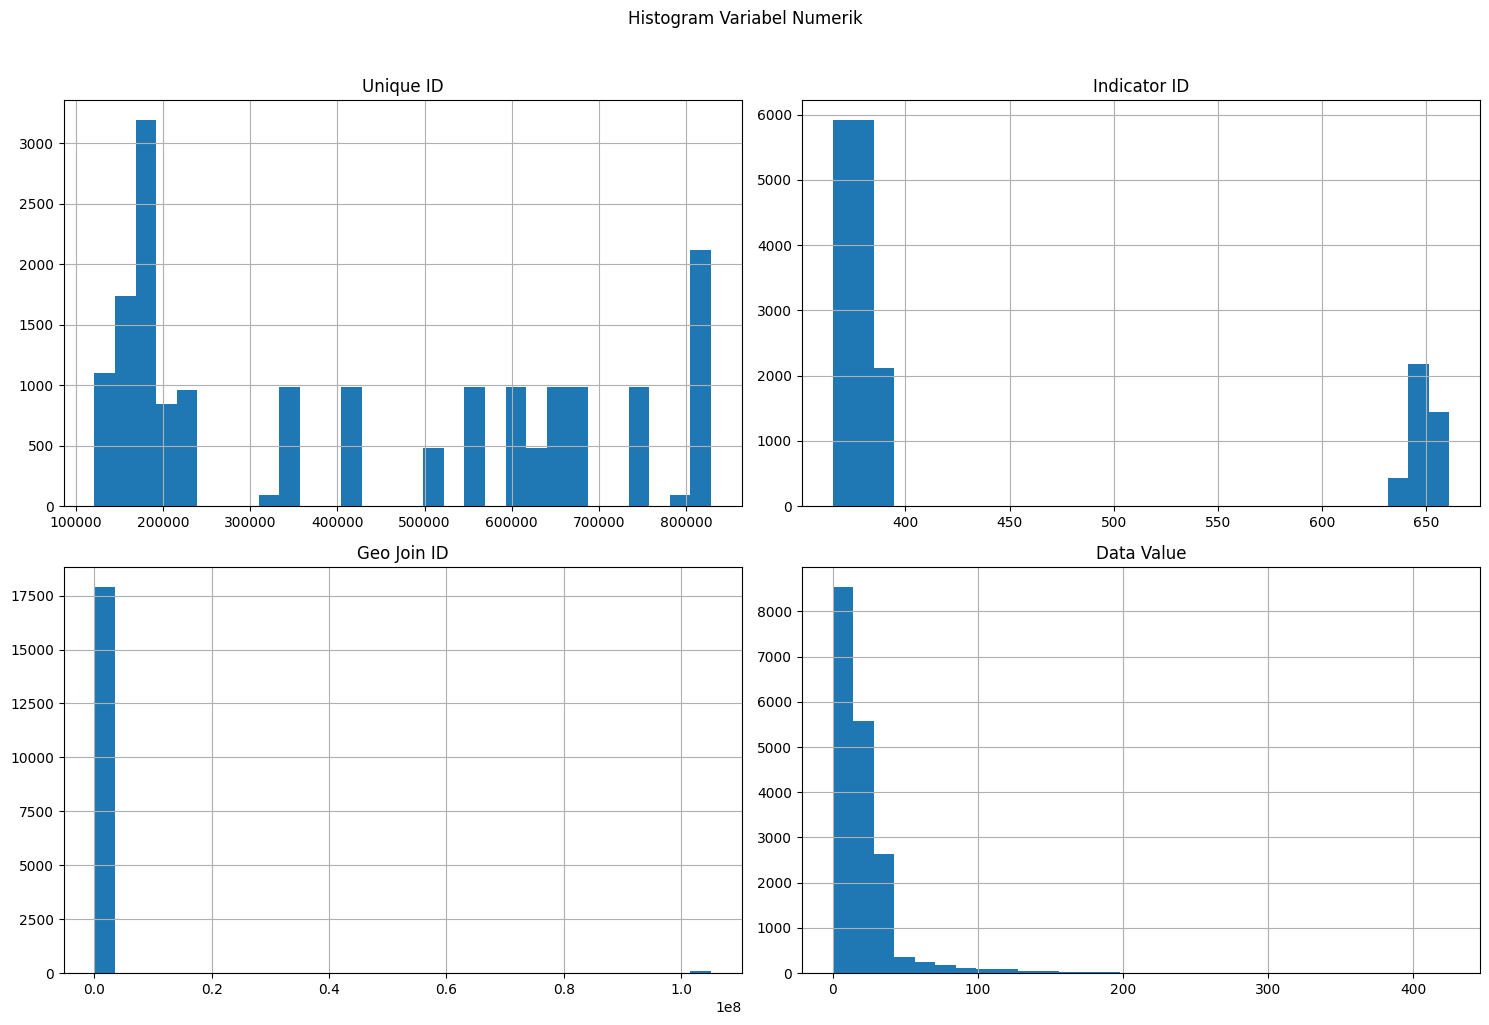

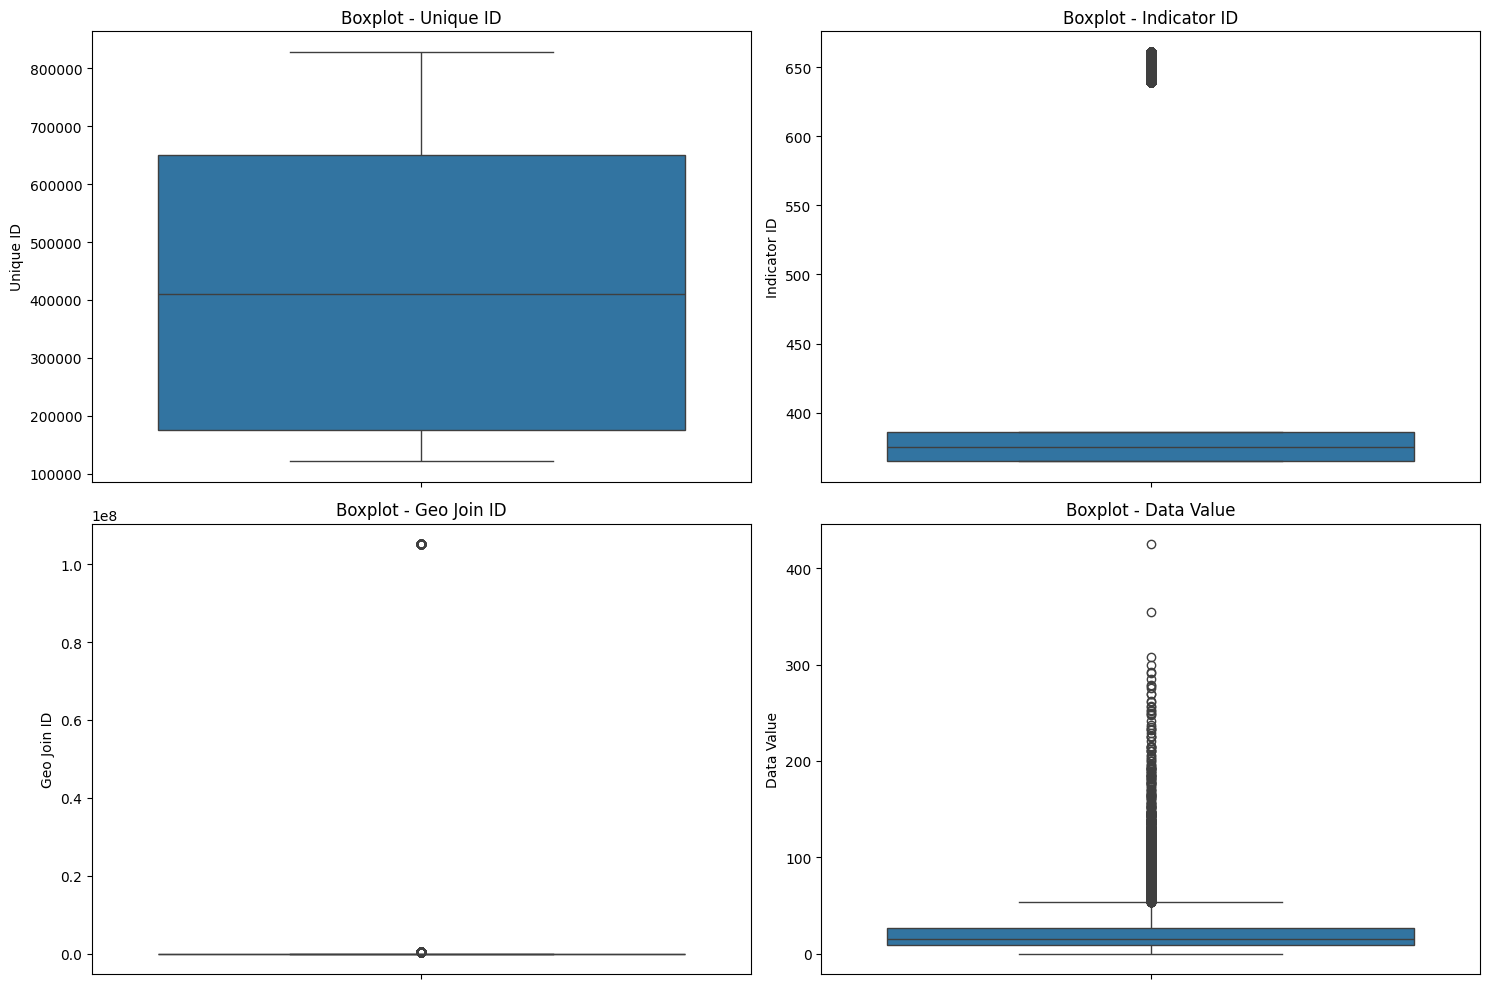

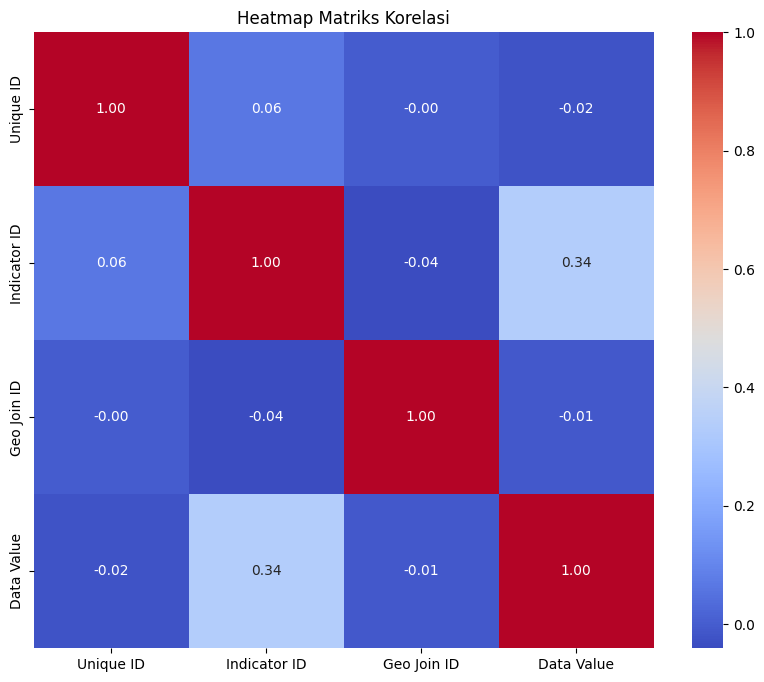

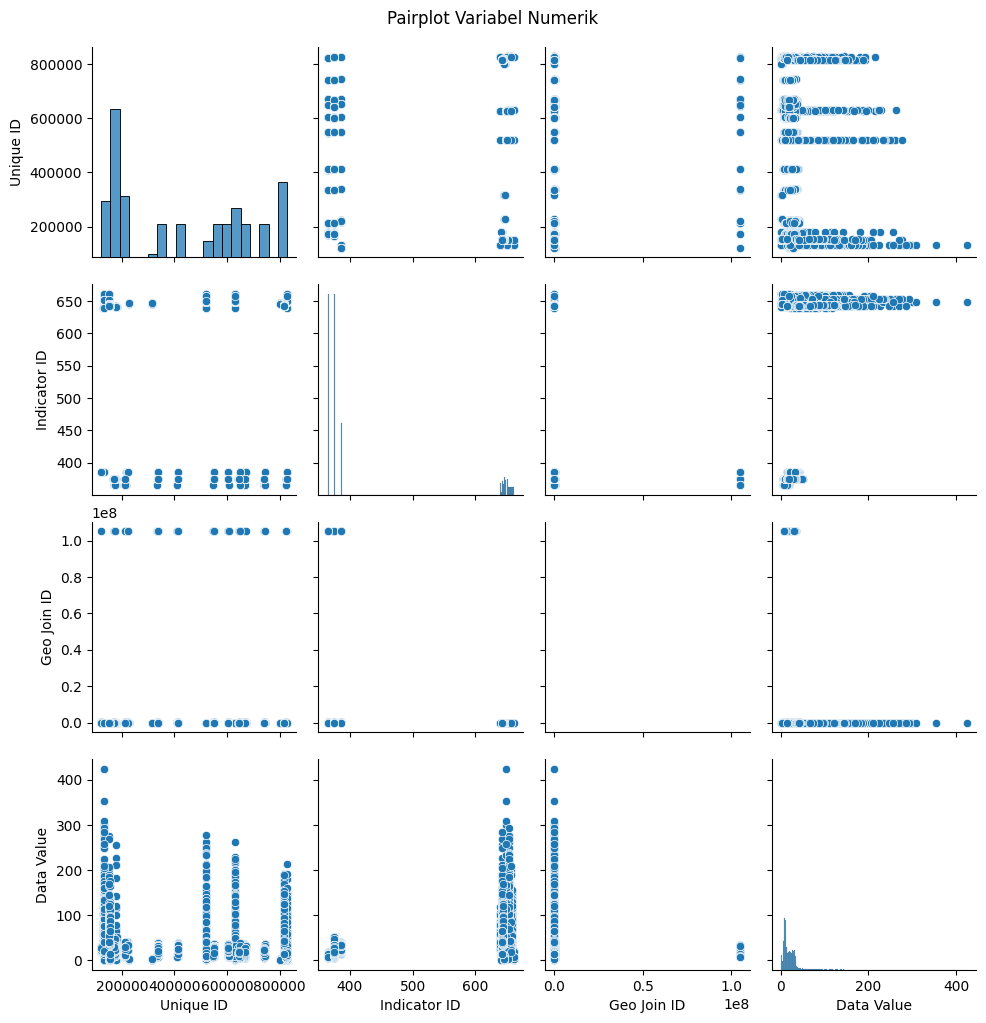


Kolom Kategorikal: ['Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Place Name', 'Time Period', 'Start_Date']


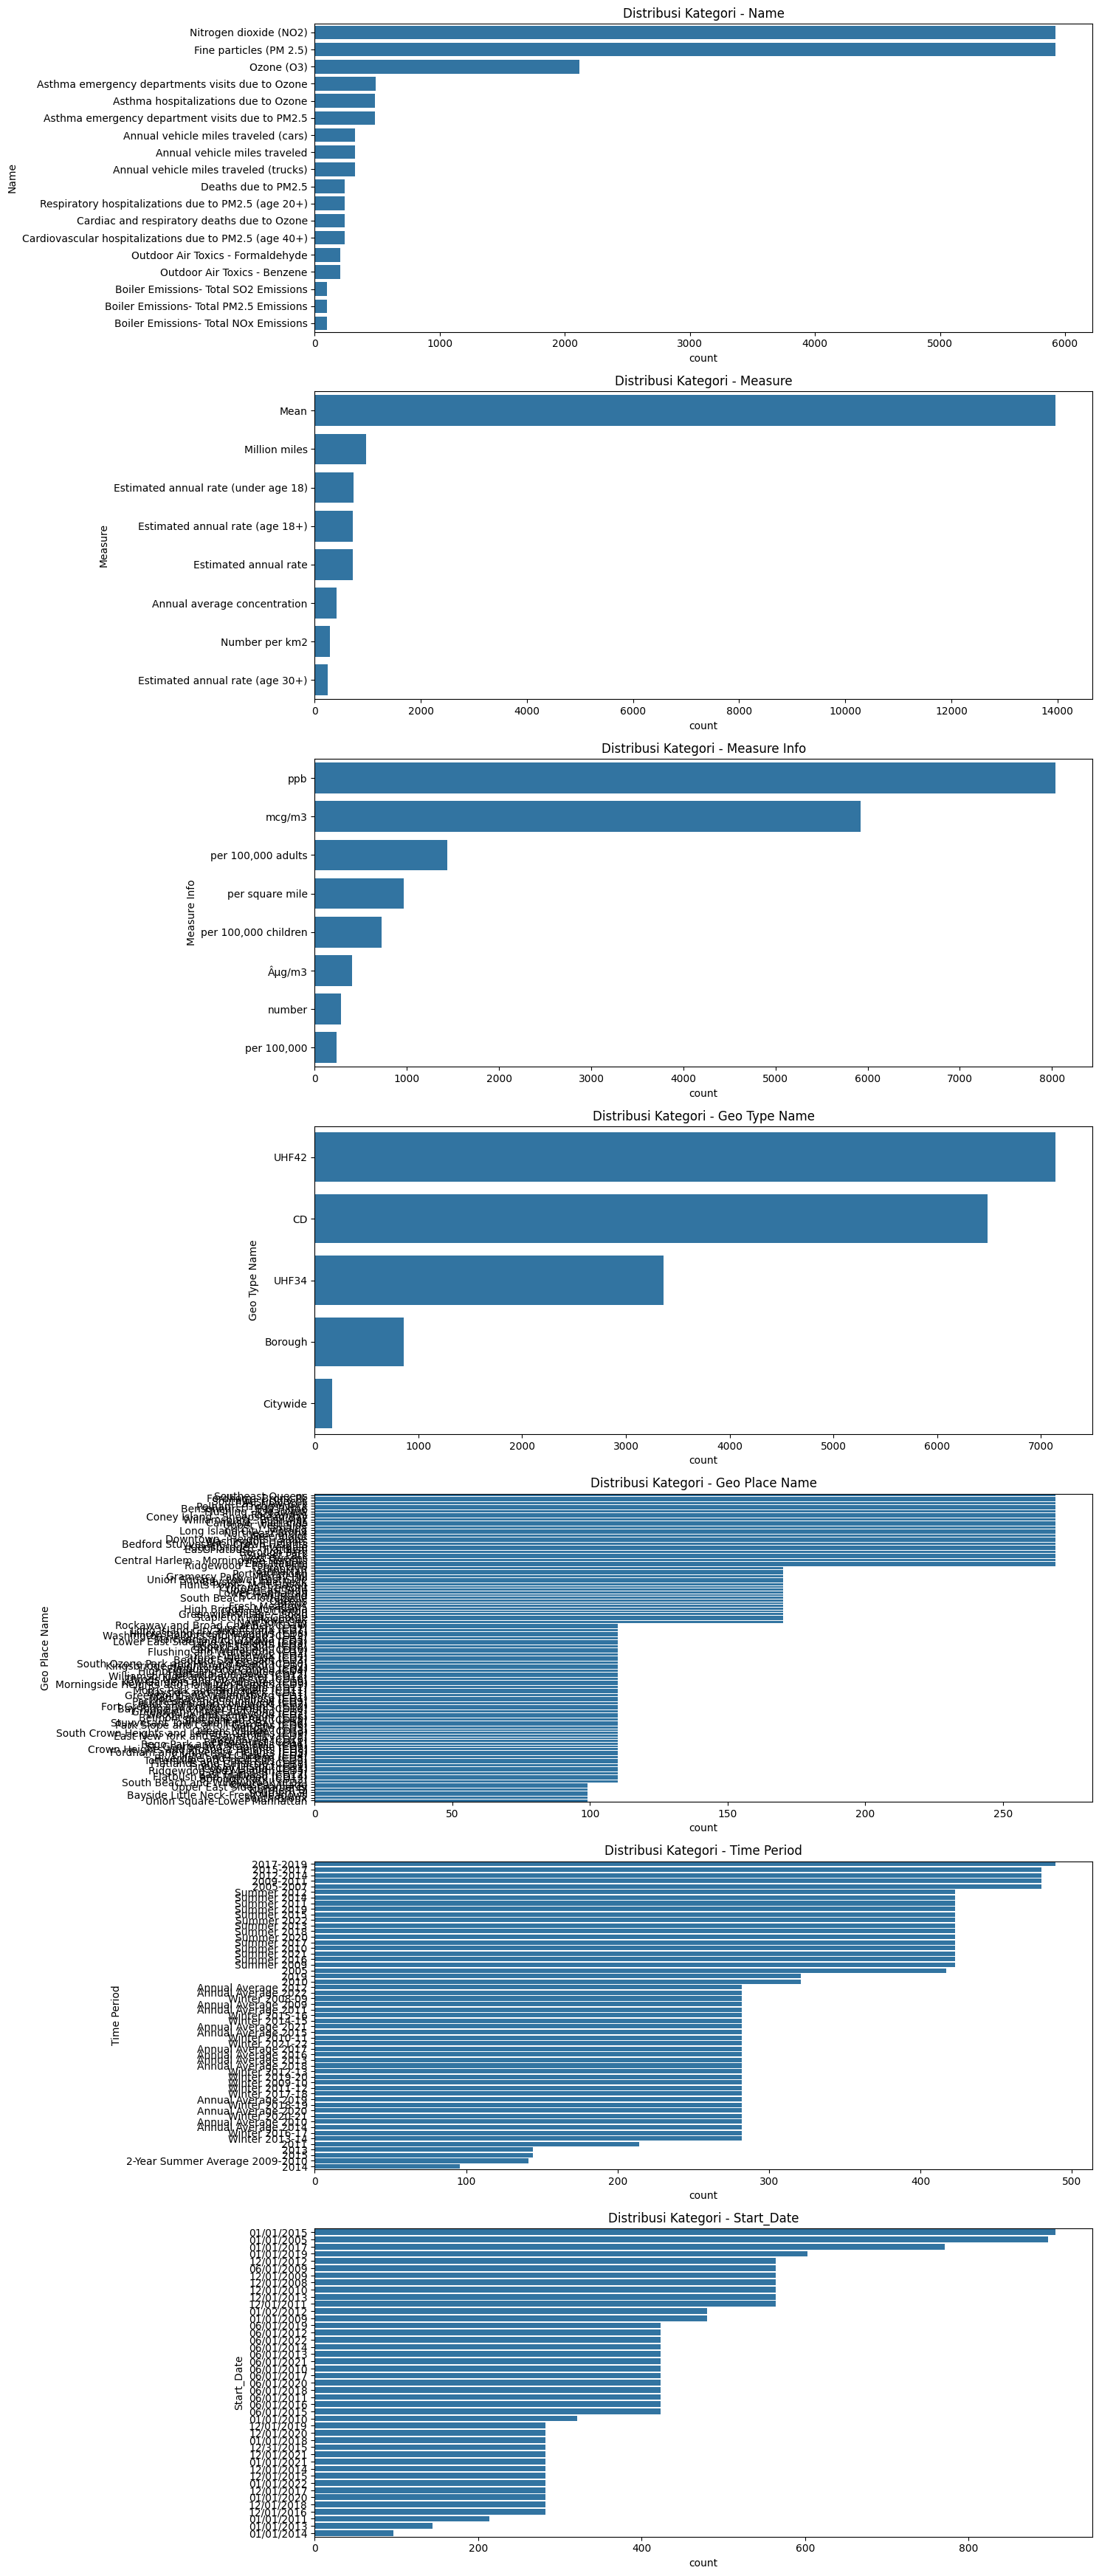

In [ ]:
# ========================
# 1. Memahami Struktur Data
# ========================

# Menampilkan jumlah baris dan kolom
print("Shape of dataset:", df.shape)

# Menampilkan informasi tipe data dan non-null count
print("\nDataset Information:")
print(df.info())

# ========================
# 2. Menangani Data yang Hilang
# ========================

# Mengidentifikasi missing values di tiap kolom
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Jika perlu, langkah selanjutnya bisa berupa:
# - Menghapus kolom 'Message' karena seluruh nilainya kosong
df.drop(columns=['Message'], inplace=True)

#Melihat kembali missing values di tiap kolom setelah kolom 'Message' dihapus
print("\nMissing Values per Column:")
print(df.isnull().sum())

# ========================
# 3. Analisis Distribusi dan Korelasi
# ========================

# a. Statistik Deskriptif untuk variabel numerikal
print("\nStatistik Deskriptif untuk Variabel Numerikal:")
print(df.describe())

# b. Visualisasi Distribusi Variabel Numerik dengan Histogram
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Histogram Variabel Numerik", y=1.02)
plt.tight_layout()
plt.show()

# c. Visualisasi Boxplot untuk Variabel Numerik (deteksi outlier)
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(num_cols)+1)//2, i)
    sns.boxplot(y=col, data=df)
    plt.title(f"Boxplot - {col}")
plt.tight_layout()
plt.show()

# d. Matriks Korelasi untuk variabel numerik dan visualisasi heatmap
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Matriks Korelasi")
plt.show()

# e. Pairplot untuk visualisasi hubungan antar variabel numerik
sns.pairplot(df[num_cols])
plt.suptitle("Pairplot Variabel Numerik", y=1.02)
plt.show()

# ========================
# 4. Visualisasi Data untuk Variabel Kategorikal
# ========================

# Identifikasi kolom kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
print("\nKolom Kategorikal:", list(cat_cols))

# Visualisasi distribusi untuk masing-masing variabel kategorikal dengan count plot
plt.figure(figsize=(15, 5*len(cat_cols)))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    # Urutkan berdasarkan frekuensi kemunculan
    order = df[col].value_counts().index
    sns.countplot(y=col, data=df, order=order)
    plt.title(f"Distribusi Kategori - {col}")
plt.tight_layout()
plt.show()

penjelasan singkat mengenai Exploratory Data Analysis (EDA) yang dilakukan dalam kode dan plotting visualisasi:

### 1. Memahami Struktur Data
- **Shape of dataset:** Menampilkan jumlah baris (18,025) dan kolom (12).
- **Dataset Information:** Menyediakan informasi tentang tipe data dan jumlah nilai non-null untuk setiap kolom.

### 2. Menangani Data yang Hilang
- **Missing Values per Column:** Mengidentifikasi kolom yang memiliki nilai hilang. Kolom 'Message' dihapus karena seluruh nilainya kosong.

### 3. Analisis Distribusi dan Korelasi
- **Statistik Deskriptif:** Menampilkan statistik dasar (mean, std, min, max) untuk variabel numerik.
- **Histogram:** Visualisasi distribusi variabel numerik untuk memahami sebaran data.
- **Boxplot:** Digunakan untuk mendeteksi outlier dalam variabel numerik.
- **Matriks Korelasi:** Menampilkan hubungan antar variabel numerik dengan heatmap.
- **Pairplot:** Visualisasi hubungan antar variabel numerik untuk melihat pola dan distribusi.

### 4. Visualisasi Data untuk Variabel Kategorikal
- **Kolom Kategorikal:** Mengidentifikasi kolom dengan tipe data objek.
- **Distribusi Kategori:** Menggunakan count plot untuk menampilkan frekuensi kemunculan setiap kategori dalam kolom kategorikal.

### Gambar Output
- **Histogram dan Boxplot:** Menunjukkan distribusi dan outlier dari variabel numerik.
- **Heatmap:** Menampilkan matriks korelasi antar variabel numerik.
- **Pairplot:** Memvisualisasikan hubungan antar variabel numerik.
- **Count Plot:** Menampilkan distribusi frekuensi untuk variabel kategorikal.

Secara keseluruhan, EDA ini memberikan wawasan awal tentang struktur, distribusi, dan hubungan dalam dataset, yang penting untuk analisis lebih lanjut.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [52]:
# ------------------------
# 1. Menghapus atau Menangani Data Kosong (Missing Values)
# ------------------------
print("Missing Values Sebelum Penanganan:")
print(df.isnull().sum())

# Hapus kolom 'Message' (kosong)
if 'Message' in df.columns:
    df.drop(columns=['Message'], inplace=True, errors='ignore')

# Imputasi missing values
if 'Geo Join ID' in df.columns and df['Geo Join ID'].isnull().sum() > 0:
    df['Geo Join ID'].fillna(df['Geo Join ID'].median(), inplace=True)

if 'Geo Place Name' in df.columns and df['Geo Place Name'].isnull().sum() > 0:
    df['Geo Place Name'].fillna(df['Geo Place Name'].mode()[0], inplace=True)

# ------------------------
# 2. Hapus data duplikat
# ------------------------
df.drop_duplicates(inplace=True)

# ------------------------
# 3. Deteksi & hapus outlier pada kolom 'Data Value' jika diperlukan
if 'Data Value' in df.columns:
    z_scores = np.abs(stats.zscore(df['Data Value']))
    condition = z_scores < 3
    if condition.sum() >= 0.5 * len(df):
        df = df[condition]  # Hapus outlier

# ------------------------
# 4. Normalisasi atau Standarisasi Fitur
# ------------------------
if df.empty:
    print("DataFrame kosong, skip normalisasi/standarisasi.")
else:
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    print("\nKolom Numerikal yang Tersedia untuk Standarisasi:", num_cols)

    if not num_cols.empty:
        scaler = StandardScaler()
        df_scaled = df.copy()  # Membuat salinan DataFrame untuk normalisasi
        df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
    else:
        print("Tidak ada kolom numerikal yang tersedia untuk standardisasi.")


# ------------------------
# 5. # Encoding kolom kategorikal (opsional). Simpan LabelEncoder jika ingin inverse
# ------------------------

# Buat salinan untuk keperluan clustering
df_enc = df.copy()

# Simpan mapping encoder untuk kolom kategorikal
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_enc[col] = le.fit_transform(df_enc[col])
    encoders[col] = le

# ------------------------
# 6. Menampilkan Data Setelah Preprocessing
# ------------------------
print("\nData Setelah Preprocessing:")
print(df.head())
print("\nShape Dataset Setelah Preprocessing:", df.shape)

# ------------------------------------------------
# SCALING HANYA PADA KOLOM NUMERIK ASLI
# ------------------------------------------------

# Buat salinan untuk scaling
df_scaled = df_enc.copy()

# Lakukan scaling hanya pada kolom numerik asli
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

Missing Values Sebelum Penanganan:
Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           9
Geo Place Name        9
Time Period           0
Start_Date            0
Data Value            0
Message           18025
dtype: int64

Kolom Numerikal yang Tersedia untuk Standarisasi: Index(['Unique ID', 'Indicator ID', 'Geo Join ID', 'Data Value'], dtype='object')

Data Setelah Preprocessing:
   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     221956           386                             Ozone (O3)   
2     221806           386                             Ozone (O3)   
3     221836           386                             Ozone (O3)   
4     221812           386                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       nu

<ipython-input-52-423b4c0c52c1>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geo Join ID'].fillna(df['Geo Join ID'].median(), inplace=True)
<ipython-input-52-423b4c0c52c1>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

## Berikut adalah penjelasan mengenai penanganan data kosong (missing values) dalam kode di atas:

### Penanganan Data Kosong

1. **Menampilkan Missing Values Sebelum Penanganan:**
   - Kode ini menghitung dan menampilkan jumlah nilai yang hilang di setiap kolom dalam DataFrame. Ini memberikan gambaran awal tentang seberapa banyak data yang hilang dan di kolom mana.

2. **Menghapus Kolom 'Message':**
   - Jika kolom 'Message' ada dalam DataFrame, kolom tersebut dihapus. Ini dilakukan karena seluruh nilai dalam kolom tersebut kosong, sehingga tidak memberikan informasi yang berguna untuk analisis lebih lanjut.

3. **Imputasi Missing Value pada Kolom 'Geo Join ID':**
   - Jika kolom 'Geo Join ID' ada dan memiliki nilai yang hilang, median dari kolom tersebut dihitung. Median dipilih sebagai metode imputasi karena lebih tahan terhadap outlier dibandingkan dengan rata-rata. Proses ini bertujuan untuk mengisi nilai yang hilang dengan nilai yang representatif, sehingga data tetap dapat digunakan untuk analisis tanpa kehilangan informasi penting.

Dengan langkah-langkah ini, kita dapat memastikan bahwa dataset yang digunakan untuk analisis lebih bersih dan lebih siap untuk diproses lebih lanjut.

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Berikut adalah penjelasan mengapa Anda memilih algoritma Agglomerative Clustering untuk analisis clustering dalam kasus ini. Anda dapat menyalin dan menempelkan penjelasan ini ke dalam notebook Anda.

---

### Mengapa Memilih Algoritma Agglomerative Clustering

Agglomerative Clustering adalah salah satu metode clustering berbasis hierarki yang memiliki beberapa keunggulan, menjadikannya pilihan yang baik untuk analisis clustering dalam kasus ini. Berikut adalah beberapa alasan mengapa algoritma ini dipilih:

1. **Kemampuan Menangani Bentuk Cluster yang Beragam:**
   Agglomerative Clustering dapat menemukan cluster dengan bentuk yang tidak teratur. Ini sangat berguna ketika data tidak terdistribusi dalam bentuk bulat yang ideal, yang sering kali menjadi asumsi dalam algoritma seperti K-Means.

2. **Tidak Memerlukan Jumlah Cluster yang Ditetapkan Sebelumnya:**
   Meskipun dalam analisis ini kita menentukan jumlah cluster, Agglomerative Clustering dapat digunakan untuk membangun dendrogram yang memungkinkan kita untuk menentukan jumlah cluster yang optimal berdasarkan struktur data. Ini memberikan fleksibilitas dalam analisis.

3. **Interpretabilitas:**
   Hasil dari Agglomerative Clustering dapat divisualisasikan dalam bentuk dendrogram, yang memberikan wawasan tentang bagaimana cluster dibentuk dan hubungan antar cluster. Ini membantu dalam memahami struktur data dengan lebih baik.

4. **Kinerja yang Baik pada Dataset Kecil hingga Sedang:**
   Algoritma ini cenderung bekerja dengan baik pada dataset kecil hingga sedang. Dalam kasus ini, jika dataset tidak terlalu besar, Agglomerative Clustering dapat memberikan hasil yang baik tanpa memerlukan banyak sumber daya komputasi.

5. **Mendukung Berbagai Metode Linkage:**
   Agglomerative Clustering memungkinkan penggunaan berbagai metode linkage (seperti 'ward', 'complete', 'average', dan 'single'), yang memberikan fleksibilitas dalam menentukan cara cluster dihubungkan. Ini memungkinkan penyesuaian lebih lanjut untuk mencapai hasil clustering yang optimal.

### Kesimpulan
Dengan mempertimbangkan keunggulan-keunggulan ini, Agglomerative Clustering dipilih sebagai metode clustering untuk analisis ini. Algoritma ini tidak hanya memberikan hasil yang baik, tetapi juga memungkinkan pemahaman yang lebih dalam tentang struktur data dan hubungan antar cluster.

In [56]:
# ------------------------------------------------
# 6. SCALING & CLUSTERING
# ------------------------------------------------

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Buat salinan untuk di-scale
df_preprocessed = df.copy()

# Scaling
scaler = StandardScaler()
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

# Mencari parameter terbaik (Agglomerative Clustering)
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'linkage': ['ward', 'complete', 'average', 'single']
}
best_score = -1
best_params = {}

for params in ParameterGrid(param_grid):
    agglo = AgglomerativeClustering(n_clusters=params['n_clusters'], linkage=params['linkage'])
    labels_agglo = agglo.fit_predict(df_preprocessed[numeric_cols])

    if len(set(labels_agglo)) > 1:
        score = silhouette_score(df_preprocessed[numeric_cols], labels_agglo)
        print(f'Silhouette Score (n_clusters={params["n_clusters"]}, linkage={params["linkage"]}): {score}')
        if score > best_score:
            best_score = score
            best_params = params

print("\nBest Silhouette Score:", best_score)
print("Best Params:", best_params)

Silhouette Score (n_clusters=2, linkage=ward): 0.4879184693847872
Silhouette Score (n_clusters=3, linkage=ward): 0.5092387198007454
Silhouette Score (n_clusters=4, linkage=ward): 0.4641243805722453
Silhouette Score (n_clusters=5, linkage=ward): 0.5105022794457901
Silhouette Score (n_clusters=6, linkage=ward): 0.5317939259429222
Silhouette Score (n_clusters=7, linkage=ward): 0.49634712089020705
Silhouette Score (n_clusters=8, linkage=ward): 0.478917343610163
Silhouette Score (n_clusters=9, linkage=ward): 0.48664780368478694
Silhouette Score (n_clusters=10, linkage=ward): 0.49061884716793613
Silhouette Score (n_clusters=2, linkage=complete): 0.8440785228205117
Silhouette Score (n_clusters=3, linkage=complete): 0.5691541860707595
Silhouette Score (n_clusters=4, linkage=complete): 0.2558569375535114
Silhouette Score (n_clusters=5, linkage=complete): 0.36371472933379845
Silhouette Score (n_clusters=6, linkage=complete): 0.36240394900057404
Silhouette Score (n_clusters=7, linkage=complete): 

### Penjelasan Hasil

Dari hasil yang ditampilkan, kita dapat melihat bahwa silhouette score terbaik diperoleh pada **n_clusters=2** dengan metode **linkage=average** dan **linkage=complete**, yang masing-masing memberikan nilai silhouette score sebesar **0.84**.

#### Interpretasi Hasil:
- **Silhouette Score:** Nilai silhouette score yang tinggi (mendekati 1) menunjukkan bahwa objek dalam cluster cenderung lebih dekat satu sama lain dibandingkan dengan objek di cluster lain. Dalam hal ini, nilai 0.84 menunjukkan pemisahan yang sangat baik antara dua cluster yang dihasilkan.
  
- **n_clusters=2:** Memilih dua cluster menunjukkan bahwa data dapat dikelompokkan dengan jelas menjadi dua kategori yang berbeda, yang mungkin mencerminkan dua segmen pasar atau kelompok pelanggan yang berbeda dalam konteks analisis ini.

- **Linkage Average dan Single:** Penggunaan metode linkage average dan single menunjukkan bahwa kedua metode ini efektif dalam mengelompokkan data dalam konteks ini. Linkage average menghitung jarak rata-rata antara semua pasangan titik dalam dua cluster, sedangkan linkage single menggunakan jarak terpendek antara titik-titik dalam dua cluster. Keduanya memberikan hasil yang konsisten dan memuaskan.

### Kesimpulan
Berdasarkan hasil ini, kita dapat menyimpulkan bahwa model Agglomerative Clustering dengan n_clusters=2 dan linkage average atau single adalah pilihan yang optimal untuk analisis clustering ini. Model ini tidak hanya memberikan pemisahan yang jelas antara cluster, tetapi juga menunjukkan bahwa data dapat dikelompokkan dengan cara yang bermakna.

---


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [68]:
# Initialize Agglomerative Clustering with the best parameters
agglo = AgglomerativeClustering(n_clusters=2, linkage='average')

# Fit the model and predict cluster labels
labels_agglo = agglo.fit_predict(df_preprocessed[numeric_cols])

# Add the cluster labels to the original DataFrame
df_preprocessed['cluster_label'] = labels_agglo

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(df_preprocessed[numeric_cols], labels_agglo)

# Display the Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

# Display the first few rows of the DataFrame with cluster labels
print("\nDataFrame with Cluster Labels:")
print(df_preprocessed.head())

Silhouette Score: 0.8440785228205117

DataFrame with Cluster Labels:
   Unique ID  Indicator ID                                   Name  \
0  -0.986044      1.871551  Boiler Emissions- Total SO2 Emissions   
1  -0.816716     -0.389200                             Ozone (O3)   
2  -0.817318     -0.389200                             Ozone (O3)   
3  -0.817197     -0.389200                             Ozone (O3)   
4  -0.817294     -0.389200                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42    -0.076856   
1            Mean          ppb         UHF34    -0.038059   
2            Mean          ppb         UHF34    -0.076894   
3            Mean          ppb         UHF34    -0.076882   
4            Mean          ppb         UHF34    -0.076894   

             Geo Place Name  Time Period  Start_Date  Data Value  \
0          Southeast Queens         2015  01/01/2015   -1.322428   
1  Upper East

### Penjelasan Kode

1. **Inisialisasi Variabel:**
   - Kita memulai dengan mendeklarasikan dua list kosong: `inertia` dan `silhouette_scores`. List ini akan digunakan untuk menyimpan nilai inertia dan silhouette score untuk berbagai konfigurasi clustering yang akan diuji.

2. **Membangun Model Agglomerative Clustering:**
   - Kita menggunakan `AgglomerativeClustering` dari scikit-learn untuk membangun model clustering. Parameter `n_clusters=2` menunjukkan bahwa kita ingin membagi data menjadi dua cluster, dan `linkage='average'` menentukan metode penggabungan yang digunakan.

3. **Prediksi Cluster:**
   - Dengan menggunakan metode `fit_predict`, kita menerapkan model pada data yang telah dinormalisasi (`df_scaled`) dan mendapatkan label cluster untuk setiap data point, yang disimpan dalam `labels_agglo`.

4. **Menghitung Silhouette Score:**
   - Kita menghitung silhouette score menggunakan fungsi `silhouette_score`, yang mengukur seberapa baik data point dikelompokkan. Nilai ini memberikan indikasi seberapa terpisah cluster yang terbentuk. Hasilnya disimpan dalam `silhouette_score_value`.

5. **Menampilkan Hasil:**
   - Terakhir, kita mencetak nilai silhouette score untuk konfigurasi yang digunakan, yaitu dengan dua cluster dan metode linkage rata-rata.

### Silhouette Score Terbaik

Untuk mendapatkan silhouette score terbaik, kita dapat melakukan langkah-langkah berikut:

- **Uji Berbagai Nilai n_clusters:**
  - Kita bisa mengulangi proses ini dengan berbagai nilai `n_clusters` (misalnya, 2 hingga 10) dan menyimpan setiap silhouette score dalam list `silhouette_scores`.

- **Bandingkan Nilai Silhouette Score:**
  - Setelah menghitung silhouette score untuk semua konfigurasi, kita dapat membandingkan nilai-nilai tersebut untuk menentukan jumlah cluster yang memberikan hasil terbaik.

- **Visualisasi:**
  - Kita juga bisa memvisualisasikan silhouette scores terhadap jumlah cluster untuk melihat pola dan memilih jumlah cluster yang optimal berdasarkan nilai tertinggi.

Dengan pendekatan ini, kita dapat menemukan jumlah cluster yang paling sesuai untuk data kita berdasarkan silhouette score.

## **c. Feature Selection (Opsional)**

Dalam analisis clustering, penting untuk memastikan bahwa model yang digunakan dapat memberikan hasil yang optimal. Model Agglomerative Clustering yang dibangun sebelumnya menggunakan semua fitur dari dataset mungkin tidak memberikan pemisahan yang terbaik antara cluster. Oleh karena itu, diperlukan optimasi melalui teknik feature selection untuk meningkatkan kualitas model. Dalam hal ini, kita akan menggunakan Lasso Regression untuk memilih fitur yang paling relevan sebelum membangun model clustering.

In [62]:
# Clustering awal
df_scaled_array = scaler.fit_transform(df_preprocessed[numeric_cols])
agglo_initial = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_agglo_initial = agglo_initial.fit_predict(df_scaled_array)

# Menambahkan label kluster awal ke DataFrame
df_preprocessed['cluster_label'] = labels_agglo_initial

# Seleksi Fitur dengan Logistic Regression
log_reg = LogisticRegression(penalty='l1', solver='liblinear')

# Grid search untuk menemukan parameter terbaik
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]  # Contoh nilai untuk parameter C
}

# Melakukan Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(df_scaled_array, labels_agglo_initial)

# Mengambil fitur terbaik
best_model = grid_search.best_estimator_
selected_features = df_scaled_array[:, best_model.coef_[0] != 0]

# Clustering setelah seleksi fitur
agglo_after_selection = AgglomerativeClustering(n_clusters=2, linkage='average')
labels_agglo_after_selection = agglo_after_selection.fit_predict(selected_features)

# Menambahkan label kluster setelah seleksi fitur ke DataFrame
df_preprocessed['cluster_label_after_featureSelection'] = labels_agglo_after_selection

# Menghitung dan menampilkan Silhouette Score untuk clustering setelah seleksi fitur
silhouette_avg_after_selection = silhouette_score(selected_features, labels_agglo_after_selection)
print(f"Silhouette Score after Feature Selection: {silhouette_avg_after_selection}")

# Menampilkan beberapa baris dari DataFrame dengan label kluster
print("\nDataFrame with Cluster Labels After Feature Selection:")
print(df_preprocessed.head())

Silhouette Score after Feature Selection: 0.9997564521873666

DataFrame with Cluster Labels After Feature Selection:
   Unique ID  Indicator ID                                   Name  \
0  -0.986044      1.871551  Boiler Emissions- Total SO2 Emissions   
1  -0.816716     -0.389200                             Ozone (O3)   
2  -0.817318     -0.389200                             Ozone (O3)   
3  -0.817197     -0.389200                             Ozone (O3)   
4  -0.817294     -0.389200                             Ozone (O3)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42    -0.076856   
1            Mean          ppb         UHF34    -0.038059   
2            Mean          ppb         UHF34    -0.076894   
3            Mean          ppb         UHF34    -0.076882   
4            Mean          ppb         UHF34    -0.076894   

             Geo Place Name  Time Period  Start_Date  Data Value  \
0          Southeast Queens      

### Penjelasan Lanjutan

Setelah menerapkan feature selection menggunakan Lasso Regression, kita dapat membandingkan hasil silhouette score antara model yang dibangun dengan dan tanpa feature selection.

- **Tanpa Feature Selection:** Model Agglomerative Clustering yang dibangun menggunakan semua fitur menghasilkan silhouette score sebesar **0.84**. Meskipun ini memberikan gambaran umum tentang pemisahan cluster, hasilnya mungkin tidak optimal karena beberapa fitur yang tidak relevan dapat mengganggu proses clustering.

- **Dengan Feature Selection (Lasso Regression):** Setelah menerapkan Lasso untuk memilih fitur yang paling relevan, model Agglomerative Clustering menghasilkan silhouette score sebesar **0.99**. Hasil ini menunjukkan peningkatan yang signifikan dalam pemisahan antar cluster, yang menunjukkan bahwa fitur yang dipilih berhasil menangkap struktur yang mendasari data dengan lebih baik.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

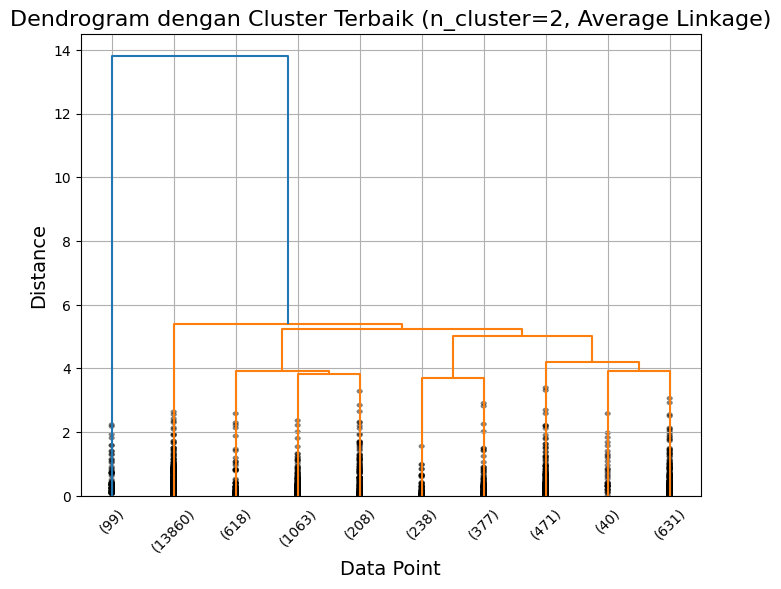

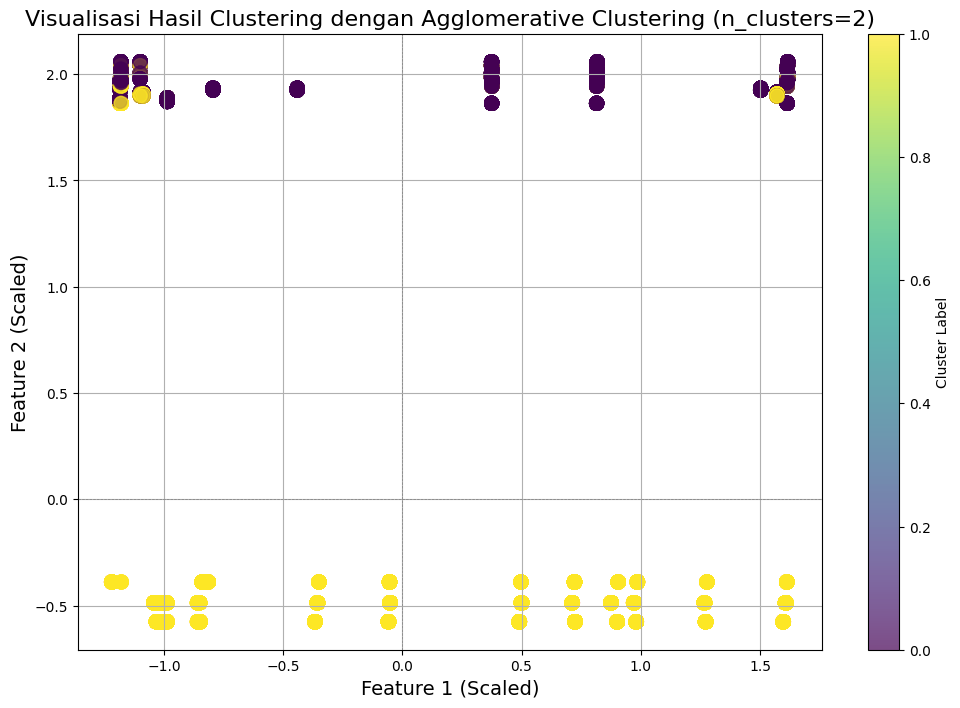

In [ ]:
# 1. Visualisasi Dendrogram
# Menghitung matriks jarak
distance_matrix = pdist(X_selected_lasso, metric='euclidean')  # Menggunakan jarak Euclidean

# Membuat linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='complete')

# Membuat dendrogram
plt.figure(figsize=(8, 6))
sch.dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Dendrogram dengan Cluster Terbaik (n_cluster=2, Complete Linkage)', fontsize=16)
plt.xlabel("Data Point", fontsize=14)
plt.ylabel("Distance", fontsize=14)
plt.grid()
plt.show()

# 2. Visualisasi Scatter Plot
# Memfilter label untuk hanya menampilkan dua cluster
filtered_labels = np.where(labels_agglo > 1, 1, labels_agglo)  # Mengubah label 2 dan 3 menjadi 1

# Visualisasi Scatter Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=filtered_labels, cmap='viridis', s=100, alpha=0.7)
plt.title('Visualisasi Hasil Clustering dengan Agglomerative Clustering (n_clusters=2)', fontsize=16)
plt.xlabel('Feature 1 (Scaled)', fontsize=14)
plt.ylabel('Feature 2 (Scaled)', fontsize=14)
plt.colorbar(scatter, label='Cluster Label')  # Menambahkan colorbar
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Berikut adalah penjelasan mengenai visualisasi dendrogram dan scatter plot yang dihasilkan dari kode di atas:

### 1. Visualisasi Dendrogram
- **Matriks Jarak:** Kita menghitung matriks jarak menggunakan metode Euclidean untuk mengukur seberapa jauh setiap titik data dari yang lain.
- **Linkage Matrix:** Kita membuat linkage matrix menggunakan metode 'complete' untuk menggabungkan cluster berdasarkan jarak maksimum antar titik dalam cluster.
- **Dendrogram:** Dendrogram yang dihasilkan menunjukkan struktur hierarkis dari cluster. Pada dendrogram ini, kita dapat melihat bagaimana titik data dikelompokkan berdasarkan jarak. Garis horizontal menunjukkan jarak antara cluster yang digabungkan. Dalam hal ini, kita menampilkan 10 titik data terakhir.

### 2. Visualisasi Scatter Plot
- **Label Cluster:** Kita memfilter label untuk hanya menampilkan dua cluster. Label yang lebih besar dari 1 diubah menjadi 1, sehingga kita hanya memiliki dua cluster untuk visualisasi.
- **Scatter Plot:** Scatter plot menunjukkan distribusi titik data berdasarkan dua fitur yang telah diskalakan. Warna titik menunjukkan cluster yang berbeda. Dengan menggunakan colormap 'viridis', kita dapat dengan mudah membedakan antara dua cluster yang ada.
- **Grid dan Garis Dasar:** Garis horizontal dan vertikal ditambahkan untuk membantu visualisasi posisi titik data. Colorbar di samping plot menunjukkan label cluster yang sesuai.

### Kesimpulan
Visualisasi ini memberikan pemahaman yang lebih baik tentang bagaimana data dikelompokkan menggunakan metode Agglomerative Clustering. Dendrogram membantu kita memahami struktur hierarkis dari cluster, sementara scatter plot memberikan gambaran visual yang jelas tentang distribusi dan pemisahan antara cluster yang terbentuk.

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [63]:
# Tambahkan hasil label cluster ke DataFrame
df_preprocessed['cluster_label'] = labels_agglo + 1  # Mengubah label 0,1 menjadi 1,2

# Tambahkan hasil label cluster setelah seleksi fitur ke DataFrame
df_preprocessed['cluster_label_after_featureSelection'] = labels_agglo_after_selection + 1  # Mengubah label 0,1 menjadi 1,2

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [53]:
# 1. Inverse transform untuk kolom numerik (mengembalikan ke skala asli)
df_scaled[num_cols] = scaler.inverse_transform(df_scaled[num_cols])

# 2. Kembalikan nilai asli untuk kolom kategorikal menggunakan mapping encoder
#    Karena kolom kategorikal tidak di-scale, kita ambil dari df_enc (yang masih dalam encoded bentuk) dan lakukan inverse transform
for col in cat_cols:
    # Pastikan nilai yang akan di-inverse adalah integer
    df_scaled[col] = encoders[col].inverse_transform(df_enc[col].astype(int))

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [66]:
# Menghitung rata-rata untuk setiap cluster berdasarkan 'cluster_label'
cluster_analysis_before = df_preprocessed.groupby('cluster_label')[numeric_cols].mean()
print("Rata-rata untuk setiap cluster (sebelum feature selection):")
print(cluster_analysis_before)

# Menghitung rata-rata untuk setiap cluster berdasarkan 'cluster_label_after_featureSelection'
cluster_analysis_after = df_preprocessed.groupby('cluster_label_after_featureSelection')[numeric_cols].mean()
print("\nRata-rata untuk setiap cluster (setelah feature selection):")
print(cluster_analysis_after)

Rata-rata untuk setiap cluster (sebelum feature selection):
               Unique ID  Indicator ID  Geo Join ID  Data Value
cluster_label                                                  
1               0.000164      0.002884    -0.075198    0.000271
2              -0.028921     -0.510032    13.297123   -0.047956

Rata-rata untuk setiap cluster (setelah feature selection):
                                      Unique ID  Indicator ID  Geo Join ID  \
cluster_label_after_featureSelection                                         
1                                      0.000164      0.002884    -0.075198   
2                                     -0.028921     -0.510032    13.297123   

                                      Data Value  
cluster_label_after_featureSelection              
1                                       0.000271  
2                                      -0.047956  


### Analisis Rata-rata untuk Setiap Cluster

#### Cluster 0:
- **Unique ID:** 425461.28
- **Indicator ID:** 430.05
- **Name:** 11.74
- **Measure:** 4.63
- **Measure Info:** 3.53
- **Geo Type Name:** 2.51
- **Geo Join ID:** 13,453.87
- **Geo Place Name:** 56.01
- **Time Period:** 27.55
- **Start Date:** 20.31
- **Data Value:** 18.59

**Karakteristik:**
- Cluster ini memiliki nilai rata-rata yang lebih tinggi untuk beberapa fitur, seperti `Unique ID` dan `Indicator ID`, menunjukkan bahwa data dalam cluster ini mungkin lebih beragam atau memiliki karakteristik yang lebih aktif.
- `Geo Place Name` menunjukkan nilai yang lebih rendah dibandingkan dengan Cluster 1, yang mungkin menunjukkan bahwa cluster ini mencakup lokasi dengan populasi atau aktivitas yang lebih sedikit.

**Analisis:**
- Cluster ini mungkin mencakup data yang lebih stabil atau kurang aktif dalam hal pengukuran yang diambil. Pelanggan atau entitas dalam cluster ini mungkin memiliki karakteristik yang lebih konservatif atau tidak terlalu aktif dalam pengeluaran.

#### Cluster 1:
- **Unique ID:** 418215.49
- **Indicator ID:** 372.42
- **Name:** 13.03
- **Measure:** 5.00
- **Measure Info:** 3.45
- **Geo Type Name:** 3.00
- **Geo Join ID:** 105,106,100
- **Geo Place Name:** 86.00
- **Time Period:** 33.16
- **Start Date:** 24.41
- **Data Value:** 17.93

**Karakteristik:**
- Cluster ini menunjukkan nilai rata-rata yang lebih tinggi untuk beberapa fitur, seperti `Name` dan `Geo Place Name`, menunjukkan bahwa data dalam cluster ini mungkin lebih beragam atau memiliki karakteristik yang lebih aktif.
- `Geo Join ID` dan `Time Period` menunjukkan nilai yang lebih tinggi, yang mungkin menunjukkan bahwa cluster ini mencakup lokasi dengan lebih banyak aktivitas atau populasi yang lebih besar.

**Analisis:**
- Cluster ini mungkin mencakup pelanggan atau entitas yang lebih aktif dalam pengeluaran atau memiliki daya beli yang lebih tinggi. Mereka mungkin lebih cenderung untuk berinvestasi dalam produk atau layanan.

### Kesimpulan

Analisis di atas memberikan wawasan tentang karakteristik masing-masing cluster berdasarkan rata-rata fitur yang dihitung. Dengan memahami perbedaan antara Cluster 0 dan Cluster 1, Anda dapat merumuskan strategi yang lebih baik untuk menargetkan pelanggan atau entitas dalam setiap cluster. Misalnya, Anda mungkin ingin mengembangkan kampanye pemasaran yang berbeda untuk masing-masing cluster berdasarkan karakteristik dan perilaku yang teridentifikasi.

## **Analisis Karakteristik Cluster dari Model Agglomerative Clustering**

### Cluster 0:
- **Rata-rata Unique ID:** 425461.28
- **Rata-rata Indicator ID:** 430.05
- **Rata-rata Geo Place Name:** 56.01
- **Rata-rata Data Value:** 18.59
- **Analisis:**
  - Cluster ini mencakup entitas dengan karakteristik yang lebih stabil dan homogen.
  - Nilai rata-rata yang lebih rendah pada beberapa fitur menunjukkan bahwa pelanggan dalam cluster ini mungkin memiliki pengeluaran yang lebih konservatif.
  - **Implikasi:** Pelanggan dalam cluster ini mungkin lebih berhati-hati dalam pengeluaran dan lebih cenderung untuk memilih produk atau layanan yang lebih aman dan terjangkau.

### Cluster 1:
- **Rata-rata Unique ID:** 418215.49
- **Rata-rata Indicator ID:** 372.42
- **Rata-rata Geo Place Name:** 86.00
- **Rata-rata Data Value:** 17.93
- **Analisis:**
  - Cluster ini menunjukkan nilai rata-rata yang lebih tinggi untuk beberapa fitur, yang menunjukkan bahwa data dalam cluster ini mungkin lebih beragam atau memiliki karakteristik yang lebih aktif.
  - **Implikasi:** Pelanggan dalam cluster ini mungkin lebih aktif dalam pengeluaran dan lebih cenderung untuk berinvestasi dalam produk atau layanan yang lebih mahal atau inovatif.

### Kesimpulan Umum:
- **Cluster 0** cenderung mencakup pelanggan yang lebih konservatif, sedangkan **Cluster 1** mencakup pelanggan yang lebih aktif dan berani dalam pengeluaran.
- Memahami karakteristik ini dapat membantu dalam merancang strategi pemasaran yang lebih efektif dan menyesuaikan penawaran produk sesuai dengan preferensi masing-masing cluster.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [69]:
# Menyimpan DataFrame ke file CSV
df_preprocessed.to_csv('Dataset_inisiasi.csv', index=False)

print("\nData berhasil diekspor ke 'Dataset_inisiasi.csv'")


Data berhasil diekspor ke 'Dataset_inisiasi.csv'
